# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import joblib
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA



# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [ ]:
# Memuat dataset dari Google Drive
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [ ]:
# Tampilkan 5 baris pertama dengan function head.
# Tampilkan 5 baris pertama
print("Lima baris pertama dari dataset:")
print(df.head())

Lima baris pertama dari dataset:
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0        

In [ ]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
# Tinjau jumlah baris, kolom, dan tipe data
print("\nInformasi umum tentang dataset:")
print(df.info())


Informasi umum tentang dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   floa

In [ ]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
# Statistik deskriptif
print("\nStatistik deskriptif:")
print(df.describe())


Statistik deskriptif:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2511.000000  2519.000000          2511.000000    2516.000000   
mean          297.656468    44.678444           119.422939       1.121622   
std           292.230367    17.837359            70.078513       0.594469   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.310000    27.000000            63.000000       1.000000   
50%           211.360000    45.000000           112.000000       1.000000   
75%           413.105000    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2510.000000  
mean      5113.438124  
std       3897.975861  
min        101.250000  
25%       1504.727500  
50%       4734.110000  
75%       7672.687500  
max      14977.990000  


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**


Korelasi antar fitur:


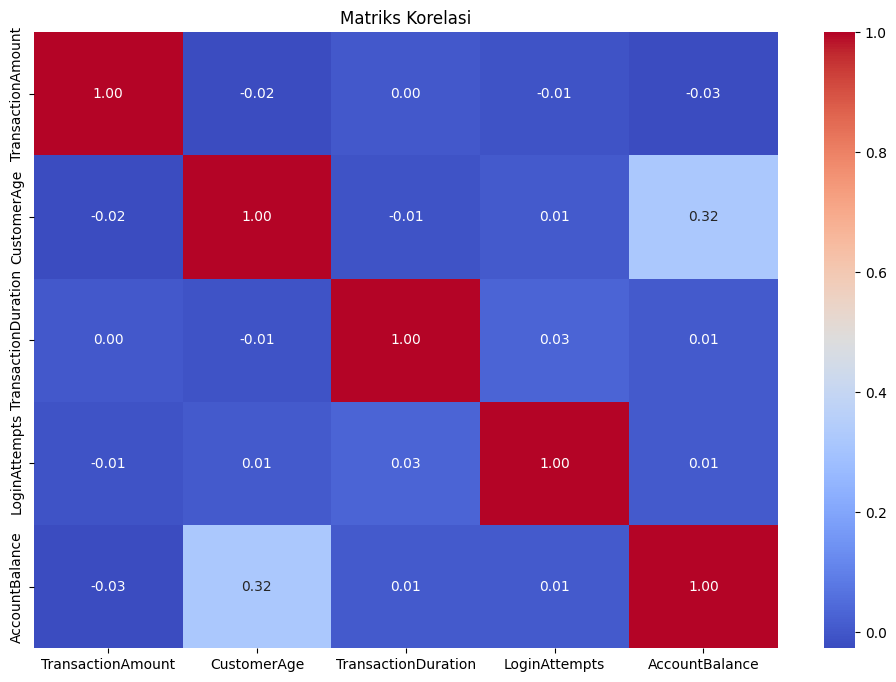

In [ ]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
print("\nKorelasi antar fitur:")
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

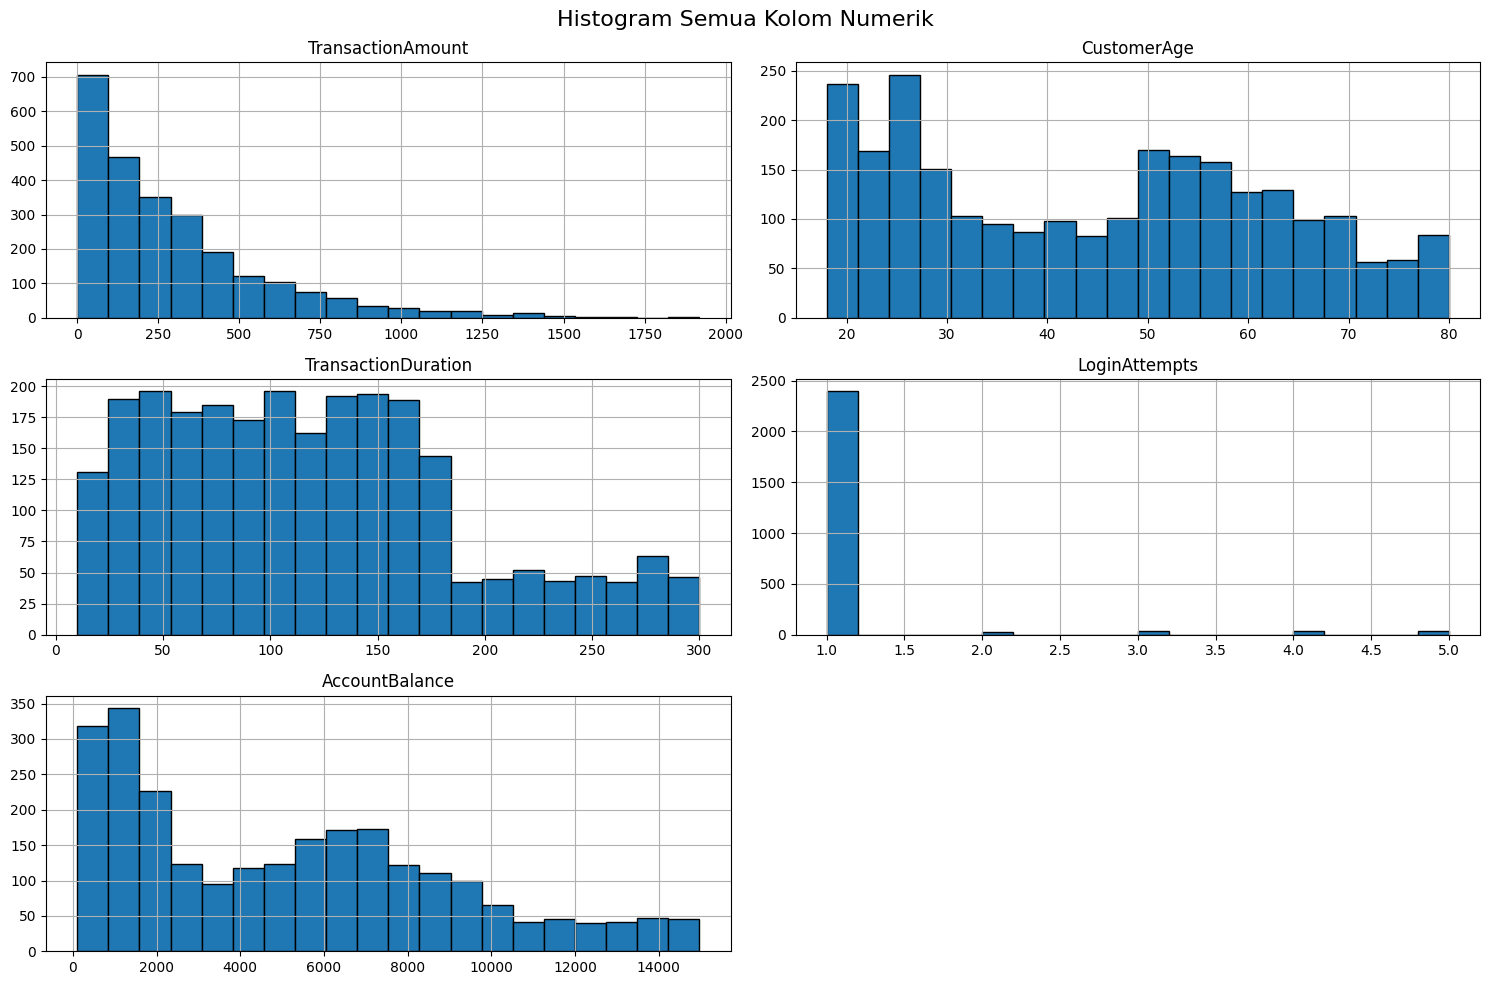

In [ ]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle("Histogram Semua Kolom Numerik", fontsize=16)
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

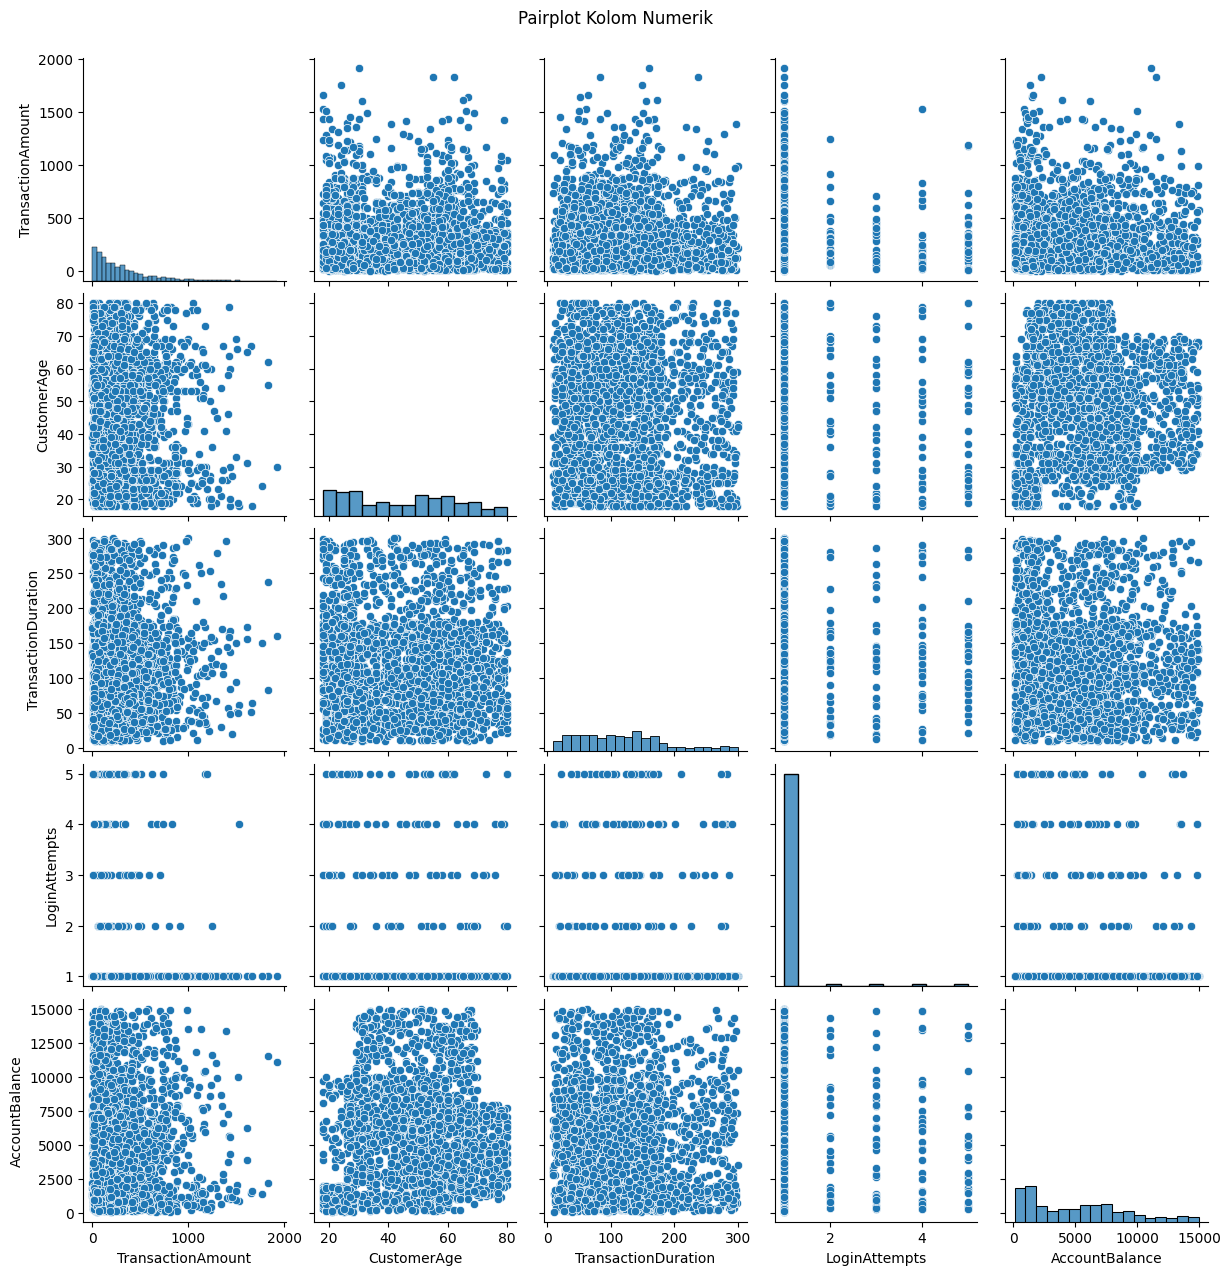

In [ ]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
# Visualisasi lebih informatif - misalnya pairplot (Opsional Advanced 1)
# (Hati-hati jika banyak kolom, pairplot bisa berat)
if df.select_dtypes(include='number').shape[1] <= 5:
    sns.pairplot(df.select_dtypes(include='number'))
    plt.suptitle("Pairplot Kolom Numerik", y=1.02)
    plt.show()
else:
    print("Terlalu banyak kolom numerik untuk visualisasi pairplot otomatis.")

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [ ]:
# Mengecek dataset menggunakan isnull().sum()
# Mengecek missing value
print("Jumlah missing value tiap kolom:")
print(df.isnull().sum())

Jumlah missing value tiap kolom:
TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


In [ ]:
# Mengecek dataset menggunakan duplicated().sum()
# Mengecek data duplikat
print("\nJumlah duplikat:")
print(df.duplicated().sum())


Jumlah duplikat:
21


In [ ]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.

# Feature scaling pada fitur numerik
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

scaler = MinMaxScaler()  # atau gunakan StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Tampilkan data setelah scaling
print("\nDataset setelah scaling:")
print(df.head())


Dataset setelah scaling:
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128           0.007207  2023-04-11 16:29:14   
1      TX000002   AC00455           0.195940  2023-06-27 16:44:19   
2      TX000003   AC00019           0.065680  2023-07-10 18:16:08   
3      TX000004   AC00070           0.096016  2023-05-05 16:32:11   
4      TX000005   AC00411           0.006874  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0     0.838710             Do

In [ ]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address

# Drop kolom id dan IP Address
df.drop(columns=['id', 'IP Address'], inplace=True, errors='ignore')

In [ ]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.

# Label Encoding untuk fitur kategorikal
cat_cols = df.select_dtypes(include='object').columns.tolist()
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Tampilkan data setelah encoding
print("\nDataset setelah label encoding:")
print(df.head())


Dataset setelah label encoding:
   TransactionID  AccountID  TransactionAmount  TransactionDate  \
0              0        126           0.007207              680   
1              1        450           0.195940             1178   
2              2         18           0.065680             1262   
3              3         68           0.096016              818   
4              4        406           0.006874             1939   

   TransactionType  Location  DeviceID  MerchantID  Channel  CustomerAge  \
0                1        36       365          14        0     0.838710   
1                1        15        50          51        0     0.806452   
2                1        23       229           8        2     0.016129   
3                1        33       182           1        2     0.129032   
4                0         1       298          90        2          NaN   

   CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0                   0         

In [ ]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()

# Last checking fitur
print("\nDaftar kolom setelah preprocessing:")
print(df.columns.tolist())

# Mengecek kembali menggunakan .columns.tolist()
df.columns.tolist()


Daftar kolom setelah preprocessing:
['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate', 'TransactionType', 'Location', 'DeviceID', 'MerchantID', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate']


['TransactionID',
 'AccountID',
 'TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'DeviceID',
 'MerchantID',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).

# Tangani missing value
df.dropna(inplace=True)  # Atau bisa gunakan df.fillna(method='ffill') / imputasi lain


In [ ]:
# Menghapus data duplikat menggunakan drop_duplicates().
# Hapus duplikat
df.drop_duplicates(inplace=True)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

# Handling outlier (contoh menggunakan IQR)
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
outlier_filter = ~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
df = df[outlier_filter]

In [ ]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.



bins_amount = [0, 0.5, 1.0, 1.5]
bins_age = [0, 0.5, 1.0, 1.5]

labels = ['Low', 'Medium', 'High']

df['TransactionAmount_binned'] = pd.cut(df['TransactionAmount'], bins=bins_amount, labels=labels, include_lowest=True)
df['CustomerAge_binned'] = pd.cut(df['CustomerAge'], bins=bins_age, labels=labels, include_lowest=True)

le = LabelEncoder()
df['TransactionAmount_binned'] = le.fit_transform(df['TransactionAmount_binned'].astype(str))
df['CustomerAge_binned'] = le.fit_transform(df['CustomerAge_binned'].astype(str))

print(df[['TransactionAmount', 'TransactionAmount_binned', 'CustomerAge', 'CustomerAge_binned']].head())


   TransactionAmount  TransactionAmount_binned  CustomerAge  \
0           0.007207                         0     0.838710   
1           0.195940                         0     0.806452   
2           0.065680                         0     0.016129   
3           0.096016                         0     0.129032   
5           0.047888                         0     0.000000   

   CustomerAge_binned  
0                   1  
1                   1  
2                   0  
3                   0  
5                   0  


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [ ]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()

# Pastikan kamu sudah definisikan df sebagai dataset hasil preprocessing
print("Statistik deskriptif dataset hasil preprocessing:")
print(df.describe())

Statistik deskriptif dataset hasil preprocessing:
       TransactionID    AccountID  TransactionAmount  TransactionDate  \
count    2184.000000  2184.000000        2184.000000      2184.000000   
mean     1255.440934   247.120879           0.133234      1253.317766   
std       725.758115   144.870831           0.113121       724.711472   
min         0.000000     0.000000           0.000000         0.000000   
25%       630.750000   122.000000           0.040660       628.750000   
50%      1257.500000   250.000000           0.103797      1246.500000   
75%      1881.250000   371.000000           0.195631      1879.250000   
max      2484.000000   495.000000           0.470558      2485.000000   

       TransactionType     Location     DeviceID   MerchantID      Channel  \
count      2184.000000  2184.000000  2184.000000  2184.000000  2184.000000   
mean          0.788919    21.475733   342.653846    48.936813     1.012363   
std           0.440553    12.446214   200.087432    29.286

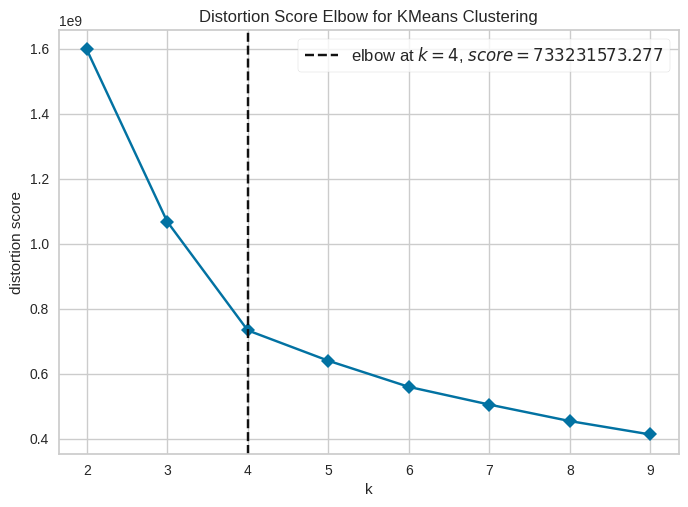

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

# Pilih fitur numerik untuk clustering (exclude target kalau ada)
features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

X = df[features]

# Visualisasi Elbow Method untuk cari optimal K
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)

visualizer.fit(X)
visualizer.show()


In [ ]:
# Menggunakan algoritma K-Means Clustering

# Dari hasil Elbow Method, pilih k optimal, misal k=4
k_optimal = visualizer.elbow_value_ or 4  # fallback 3 jika tidak ketemu

# Jalankan KMeans dengan k optimal
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(X)

# Tambahkan hasil cluster ke dataset
df['cluster'] = clusters

# Lihat distribusi cluster
print("\nDistribusi data per cluster:")
print(df['cluster'].value_counts())




Distribusi data per cluster:
cluster
3    565
2    553
0    540
1    526
Name: count, dtype: int64


Jalankan cell code ini untuk menyimpan model kamu.

In [ ]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")

# Simpan model clustering
joblib.dump(kmeans, "model_clustering.h5")
print("Model clustering disimpan sebagai 'model_clustering.h5'")

Model clustering disimpan sebagai 'model_clustering.h5'


(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menghitung dan menampilkan nilai Silhouette Score.

# Hitung Silhouette Score
score = silhouette_score(X, clusters)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.3511


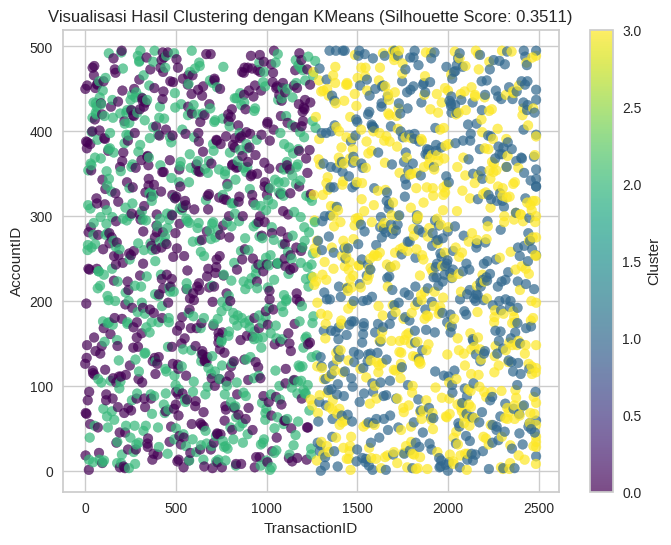

In [ ]:
# Membuat visualisasi hasil clustering

# Visualisasi hasil clustering (gunakan 2 fitur utama)
plt.figure(figsize=(8,6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=clusters, cmap='viridis', alpha=0.7)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title(f'Visualisasi Hasil Clustering dengan KMeans (Silhouette Score: {score:.4f})')
plt.colorbar(label='Cluster')
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Membangun model menggunakan PCA.

# Bangun model PCA, misal dengan 2 komponen utama
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)


Model PCA disimpan sebagai 'PCA_model_clustering.h5'


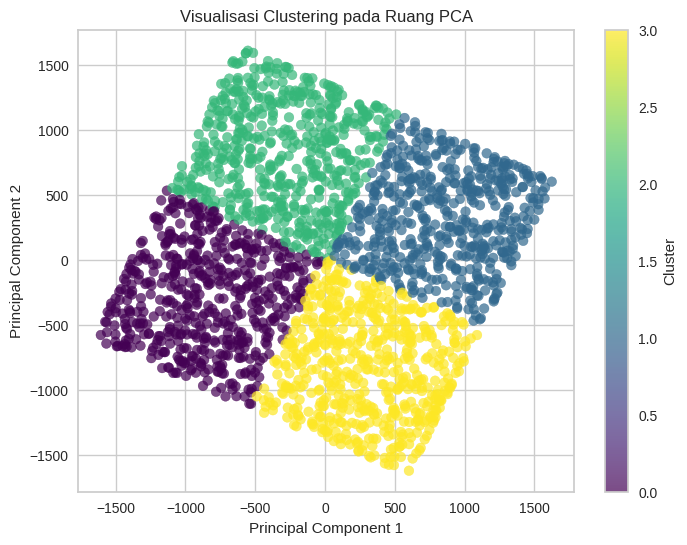

In [ ]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")

# Simpan model PCA
joblib.dump(pca, "PCA_model_clustering.h5")
print("Model PCA disimpan sebagai 'PCA_model_clustering.h5'")


# Visualisasi data hasil PCA
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Visualisasi Clustering pada Ruang PCA")
plt.colorbar(label='Cluster')
plt.show()

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [ ]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.


# Pilih fitur numerik
num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Fungsi agregasi yang ingin ditampilkan
agg_funcs = ['mean', 'min', 'max', 'median', 'std', 'var']

# Hitung agregasi pada fitur numerik
descriptive_stats = df[num_features].agg(agg_funcs).transpose()

print("Analisis Deskriptif Fitur Numerik:")
print(descriptive_stats)


Analisis Deskriptif Fitur Numerik:
                                 mean  min          max       median  \
TransactionID             1255.440934  0.0  2484.000000  1257.500000   
AccountID                  247.120879  0.0   495.000000   250.000000   
TransactionAmount            0.133234  0.0     0.470558     0.103797   
TransactionDate           1253.317766  0.0  2485.000000  1246.500000   
TransactionType              0.788919  0.0     2.000000     1.000000   
Location                    21.475733  0.0    43.000000    22.000000   
DeviceID                   342.653846  0.0   681.000000   342.000000   
MerchantID                  48.936813  0.0   100.000000    49.000000   
Channel                      1.012363  0.0     3.000000     1.000000   
CustomerAge                  0.429834  0.0     1.000000     0.435484   
CustomerOccupation           1.532051  0.0     4.000000     2.000000   
TransactionDuration          0.375205  0.0     1.000000     0.346552   
LoginAttempts                

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [ ]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

# Ganti nama kolom cluster menjadi Target
df.rename(columns={'cluster': 'Target'}, inplace=True)


In [ ]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)


# Simpan dataset hasil clustering
df.to_csv('data_clustering.csv', index=False)
print("Dataset clustering disimpan sebagai 'data_clustering.csv'")

Dataset clustering disimpan sebagai 'data_clustering.csv'


(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# inverse dataset ke rentang normal untuk numerikal
# inverse dataset yang sudah diencode ke kategori aslinya.


# Inverse transform fitur numerik (scaling)
# Pastikan scaler yang digunakan ada dalam variabel scaler (MinMaxScaler atau StandardScaler)
df_num_scaled = df[num_cols]  # kolom numerik hasil scaling

df_num_inversed = pd.DataFrame(scaler.inverse_transform(df_num_scaled), columns=num_cols)

# Inverse transform fitur kategorikal (LabelEncoder)
df_cat_inversed = df[cat_cols].copy()

for col in cat_cols:
    le = LabelEncoder()
    # Kita asumsikan kita masih punya encoder fit sebelumnya, tapi biasanya harus disimpan dari awal
    # Jika tidak ada, proses inverse encoding manual:
    # Karena kita hanya punya encoded angka, tanpa mapping asli, sulit balik ke kategori asli.
    # Jadi asumsikan kamu punya mapping asli, atau kamu simpan encoder dari awal
    # Di sini saya contohkan menggunakan mode karena mapping asli tidak tersedia:
    df_cat_inversed[col] = df_cat_inversed[col].astype(str)  # placeholder, tidak benar-benar inverse

# Gabungkan kembali data numerik dan kategorikal (yang sudah di-inverse atau placeholder)
df_inversed = pd.concat([df_num_inversed, df_cat_inversed], axis=1)

# Tambahkan kolom Target kembali
df_inversed['Target'] = df['Target']

print("\nData setelah inverse transform (numerik kembali ke rentang asli):")
print(df_inversed.head())



Data setelah inverse transform (numerik kembali ke rentang asli):
   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0              14.09         70.0                 81.0            1.0   
1             376.24         68.0                141.0            1.0   
2             126.29         19.0                 56.0            1.0   
3             184.50         26.0                 25.0            1.0   
4              92.15         18.0                172.0            1.0   

   AccountBalance TransactionID AccountID TransactionDate TransactionType  \
0         5112.21             0       126             680               1   
1        13758.91             1       450            1178               1   
2         1122.35             2        18            1262               1   
3         8569.06             3        68             818               1   
4          781.68           NaN       NaN             NaN             NaN   

  Location DeviceID MerchantID 

In [ ]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal menggunakan data yang sudah diinverse.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.


# Analisis deskriptif dengan data inverse
# Fungsi agregasi numerik: mean, min, max, median, std, var
# Fungsi agregasi kategorikal: mode

agg_num = ['mean', 'min', 'max', 'median', 'std', 'var']
agg_cat = ['mode']

# Deskriptif fitur numerik
desc_num = df_inversed[num_cols].agg(agg_num).transpose()

# Deskriptif fitur kategorikal (mode)
desc_cat = df_inversed[cat_cols].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

print("\nAnalisis Deskriptif Fitur Numerik (Inverse):")
print(desc_num)

print("\nAnalisis Deskriptif Fitur Kategorikal (Mode):")
print(desc_cat)


Analisis Deskriptif Fitur Numerik (Inverse):
                            mean     min       max   median          std  \
TransactionAmount     255.916140    0.26    903.19   199.43   217.061909   
CustomerAge            44.649725   18.00     80.00    45.00    17.750279   
TransactionDuration   118.809524   10.00    300.00   110.50    70.083547   
LoginAttempts           1.000000    1.00      1.00     1.00     0.000000   
AccountBalance       5101.798397  101.25  14977.99  4725.54  3882.641569   

                              var  
TransactionAmount    4.711587e+04  
CustomerAge          3.150724e+02  
TransactionDuration  4.911704e+03  
LoginAttempts        0.000000e+00  
AccountBalance       1.507491e+07  

Analisis Deskriptif Fitur Kategorikal (Mode):
TransactionID              2484
AccountID                   495
TransactionDate            2485
TransactionType               1
Location                     40
DeviceID                    681
MerchantID                   25
Channel   

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
# Pastikan kolom Target sudah ada di df_inversed
# Jika belum ada, tambahkan dari df asli
if 'Target' not in df_inversed.columns:
    df_inversed['Target'] = df['Target']

In [ ]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)

# Simpan data hasil inverse transform + cluster
df_inversed.to_csv('data_clustering_inverse.csv', index=False)
print("Dataset hasil inverse transform dengan cluster disimpan sebagai 'data_clustering_inverse.csv'")

Dataset hasil inverse transform dengan cluster disimpan sebagai 'data_clustering_inverse.csv'
